<a href="https://colab.research.google.com/github/Sanketkamble01/YES-BANK-Stock-closing-price-prediction/blob/main/YES_BANK_Stock_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project : Yes Bank Stock Closing Price Prediction**
# **Project Type:** Supervised - Regression
#**Project by:** Sanket Kamble

#Data Science Trainee at AlmaBetter
#  **Contribution**    - Individual
 


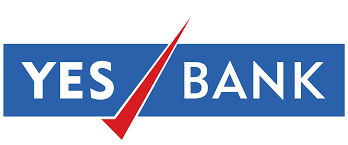

# **Problem Statement**
> Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **What is meaning of stock?**

> A financial instrument that represents ownership in a corporation is the stock or share, commonly referred to as the "equity" of a company.

# We have the **YES BANK Stock Price** dataset. It has the following characteristics:

**Open:** The price at which a stock began trading when the opening bell rang
is referred to as the "open."

**High:** When we talk about high, we mean the maximum pricing at given time.

**Low:** Low pricing are  minimum prices  in a given time period.

**Close:**The closing price of a stock is its market value at the ending of a trading day.

**Date:** It indicates the date of the investment .

# **About data**

> The Dataset has Opening, Highest, Lowest and the Closing Prices of the Stock in every month.

# **We import the necessary libraries:**



In [ ]:
#libraries for data handelling
import pandas as pd
import numpy as np
from numpy import math
from xgboost import XGBRegressor

#Removing Warnings.
import warnings
warnings.filterwarnings('ignore')

#Machine Learning Libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,LogisticRegression,ElasticNet
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
from xgboost import XGBRegressor

from sklearn.ensemble import GradientBoostingRegressor


#libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read CSV files
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 2/data_YesBank_StockPrices.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.shape

(185, 5)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


# **Data cleaning:**
Here we need to check null values and duplicate Values.

In [ ]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

* Thus, there is no missing and duplicate value in our data.


* The 'date' columns is as object type,we have to convert it to 'datetime' for better analysis.

In [ ]:
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [ ]:
#Summarry of dataset
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


# **Exploratory Data Analysis (EDA)**

Our target is to predict the closing cost, in this way let's at to begin with see closing cost, as detailed in 'close' cloumn of data.

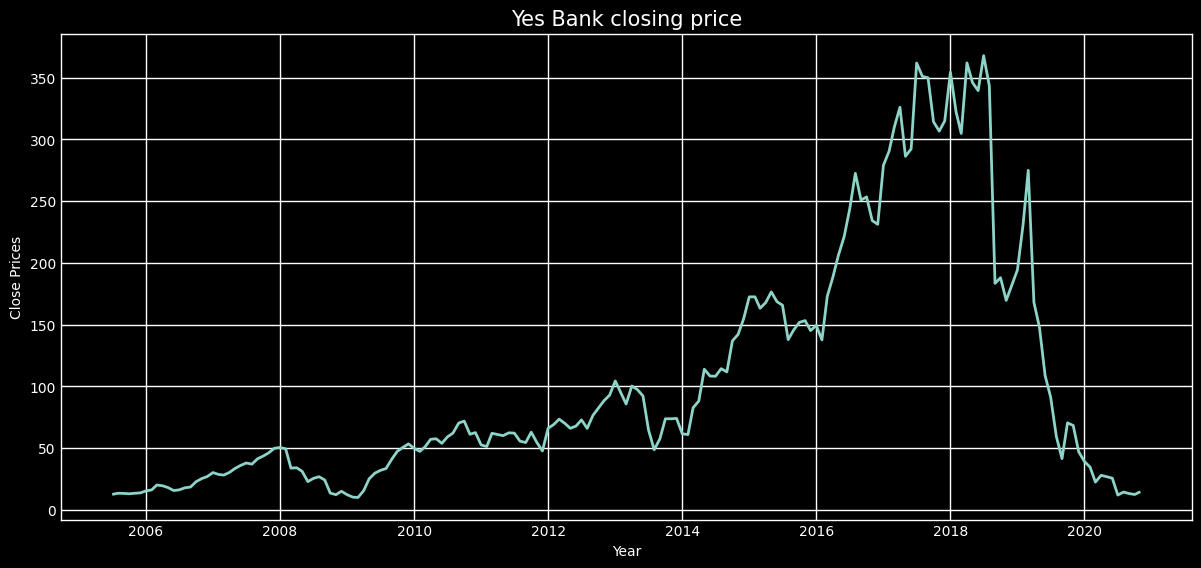

In [ ]:
#plotting close price vs date
plt.figure(figsize=(13,6))
plt.xlabel('Year', fontsize=10)
plt.ylabel('Close Prices', fontsize=10)
plt.plot(df['Date'], df['Close'])
plt.grid(True)
plt.title('Yes Bank closing price', fontsize=15)
plt.show()

# **Conclusion**
As we can see in this graph, the Share prices increase from 2014 to 2018 and then fell sharply. It rose again in 2019, but fell again.

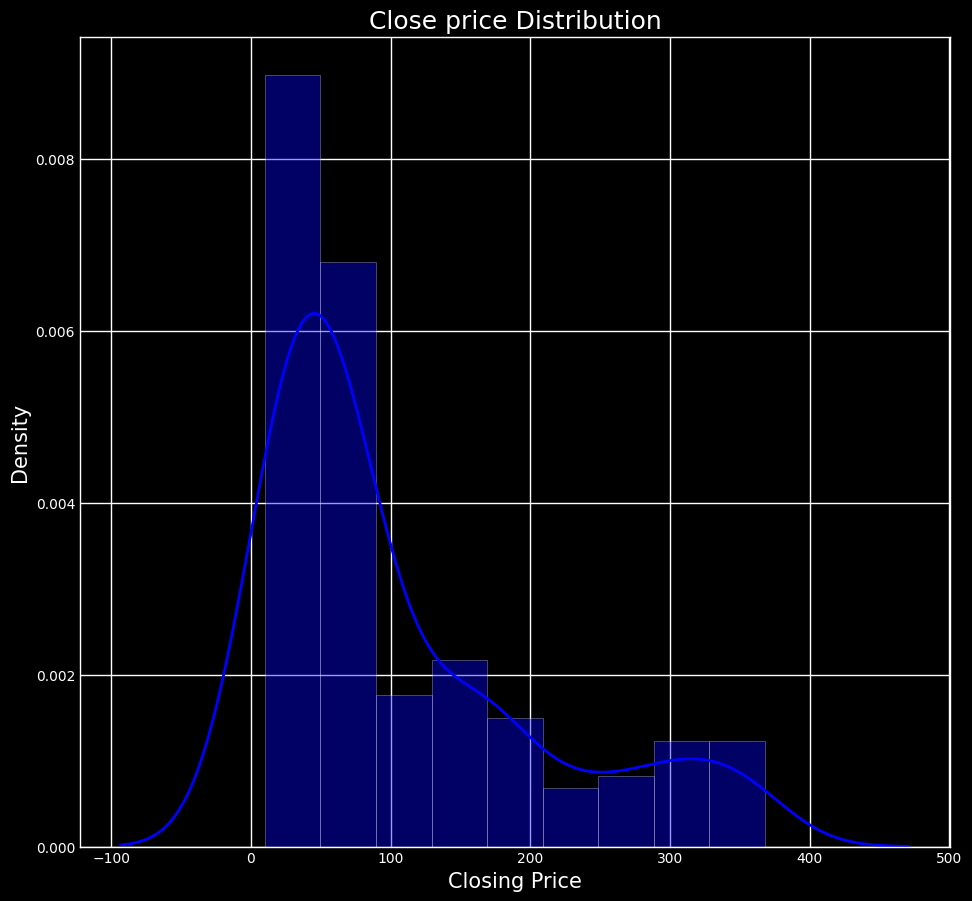

In [ ]:
#distribution plot of Close price
plt.figure(figsize=(10,10))
sns.distplot(df['Close'],color="blue")
plt.title('Close price Distribution', fontsize=18)
plt.xlabel('Closing Price', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

# **Conclusion**


*  Data of closing price distribution plot is Right skewed
*  apply log transformation to make uniform  distribution.



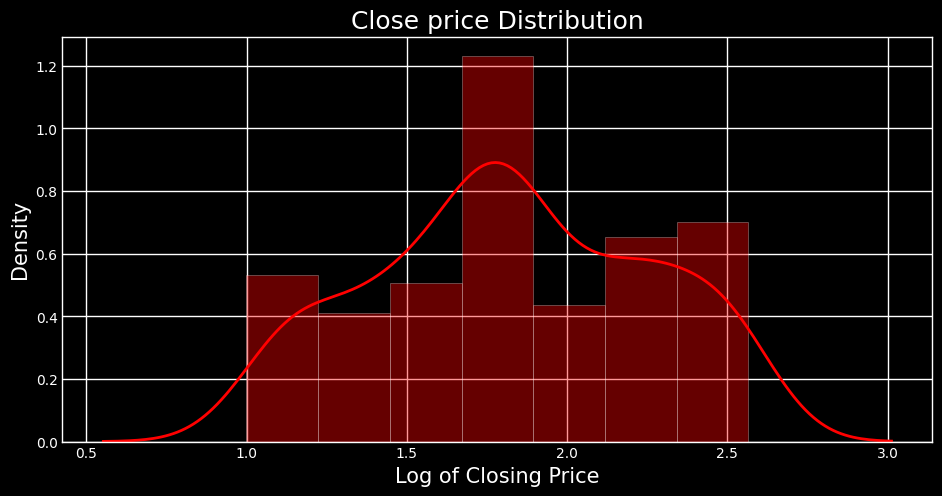

In [ ]:
#Applying log transformation to Close price distribution plot
plt.figure(figsize=(10,5))
sns.distplot(np.log10(df['Close']),color='red')
plt.title('Close price Distribution', fontsize=18)
plt.xlabel('Log of Closing Price', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

# **Conclusion**
* After the log transformation, the closing price distribution is more normal

Numerical features distribution i.e Open, Low and high price of share.

Text(0.5, 1.0, 'Lowest price of day distribution')

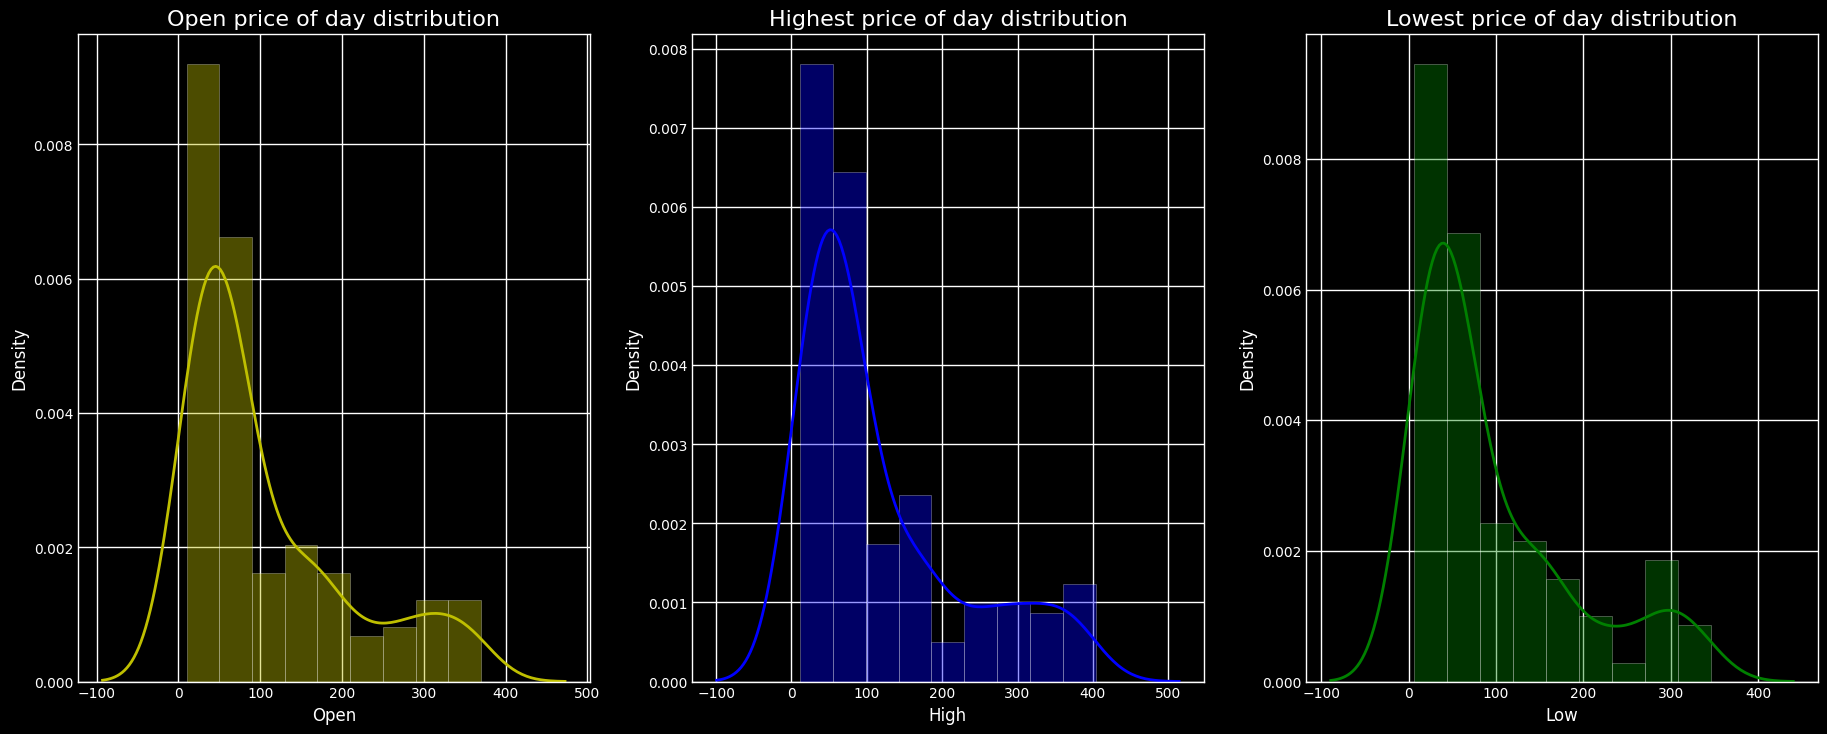

In [ ]:
#Plot the distribution for Open,High and low.
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.distplot(df['Open'], color = 'y')
plt.title('Open price of day distribution')

plt.subplot(1,3,2)
sns.distplot(df['High'] , color = 'blue')
plt.title('Highest price of day distribution')

plt.subplot(1,3,3)
sns.distplot(df['Low'] , color = 'green')
plt.title('Lowest price of day distribution')

# **Conclusion**


*   All the above distribution is right skewed
*   To make them normally distributed apply log transformation



Plot the distribution for each of the numeric features by applying a log transformation

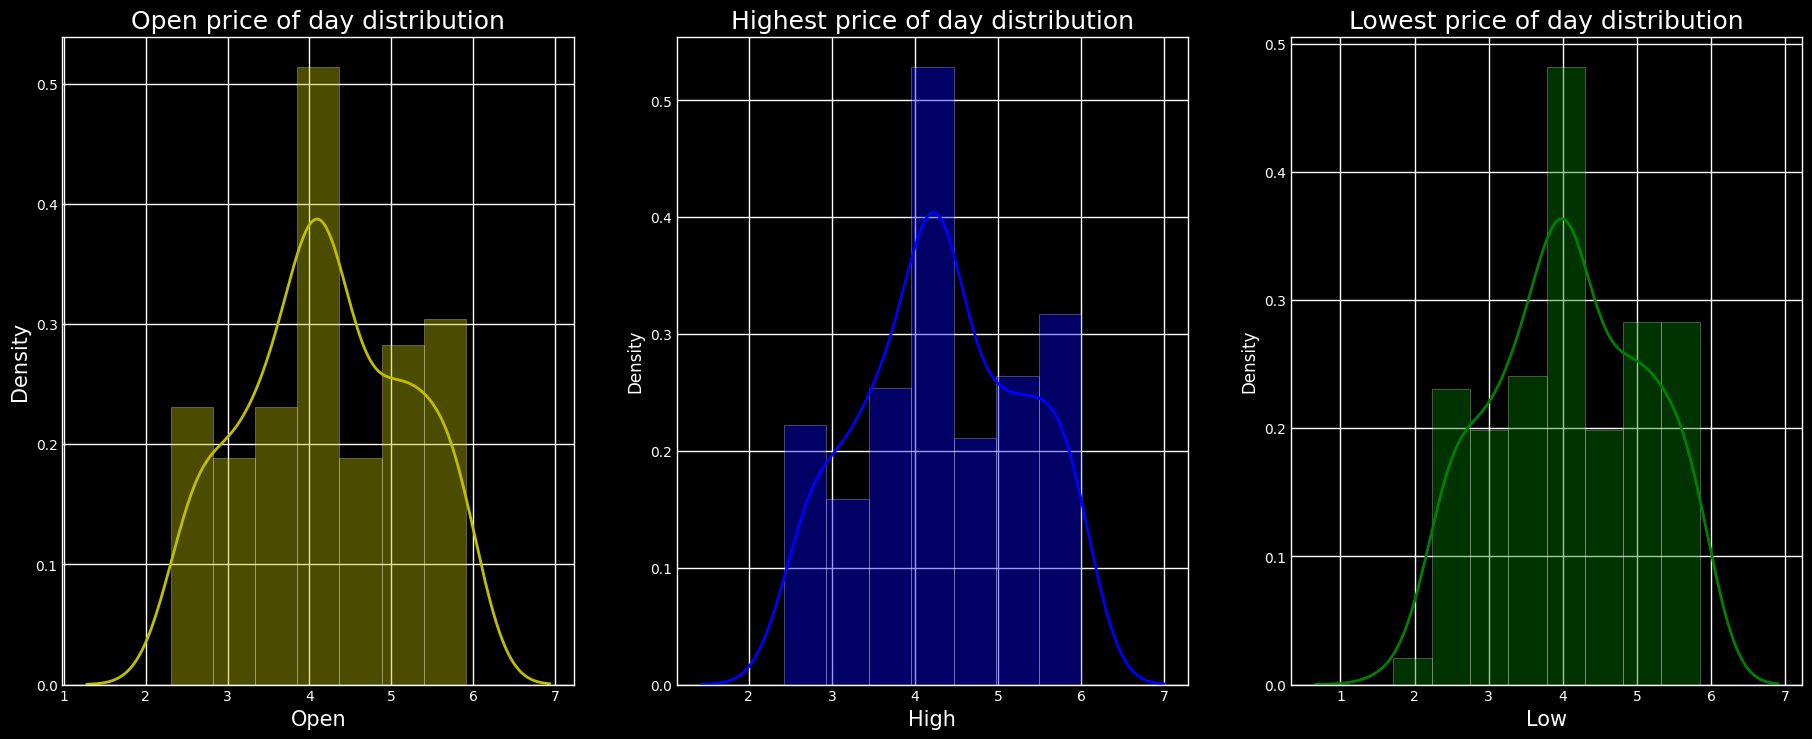

In [ ]:
plt.figure(figsize = (20,8))

plt.subplot(1, 3, 1)
sns.distplot(np.log(df['Open']), color = 'y')
plt.title('Open price of day distribution', fontsize=18)
plt.xlabel('Open', fontsize= 15)
plt.ylabel('Density', fontsize=15)

plt.subplot(1, 3, 2)
sns.distplot(np.log(df['High']), color = 'blue')
plt.title('Highest price of day distribution', fontsize=18)
plt.xlabel('High', fontsize= 15)

plt.subplot(1, 3, 3)
sns.distplot(np.log(df['Low']), color = 'green')
plt.title('Lowest price of day distribution', fontsize=18)
plt.xlabel('Low', fontsize= 15)

plt.show()

Text(0.5, 1.0, 'Low vs Close')

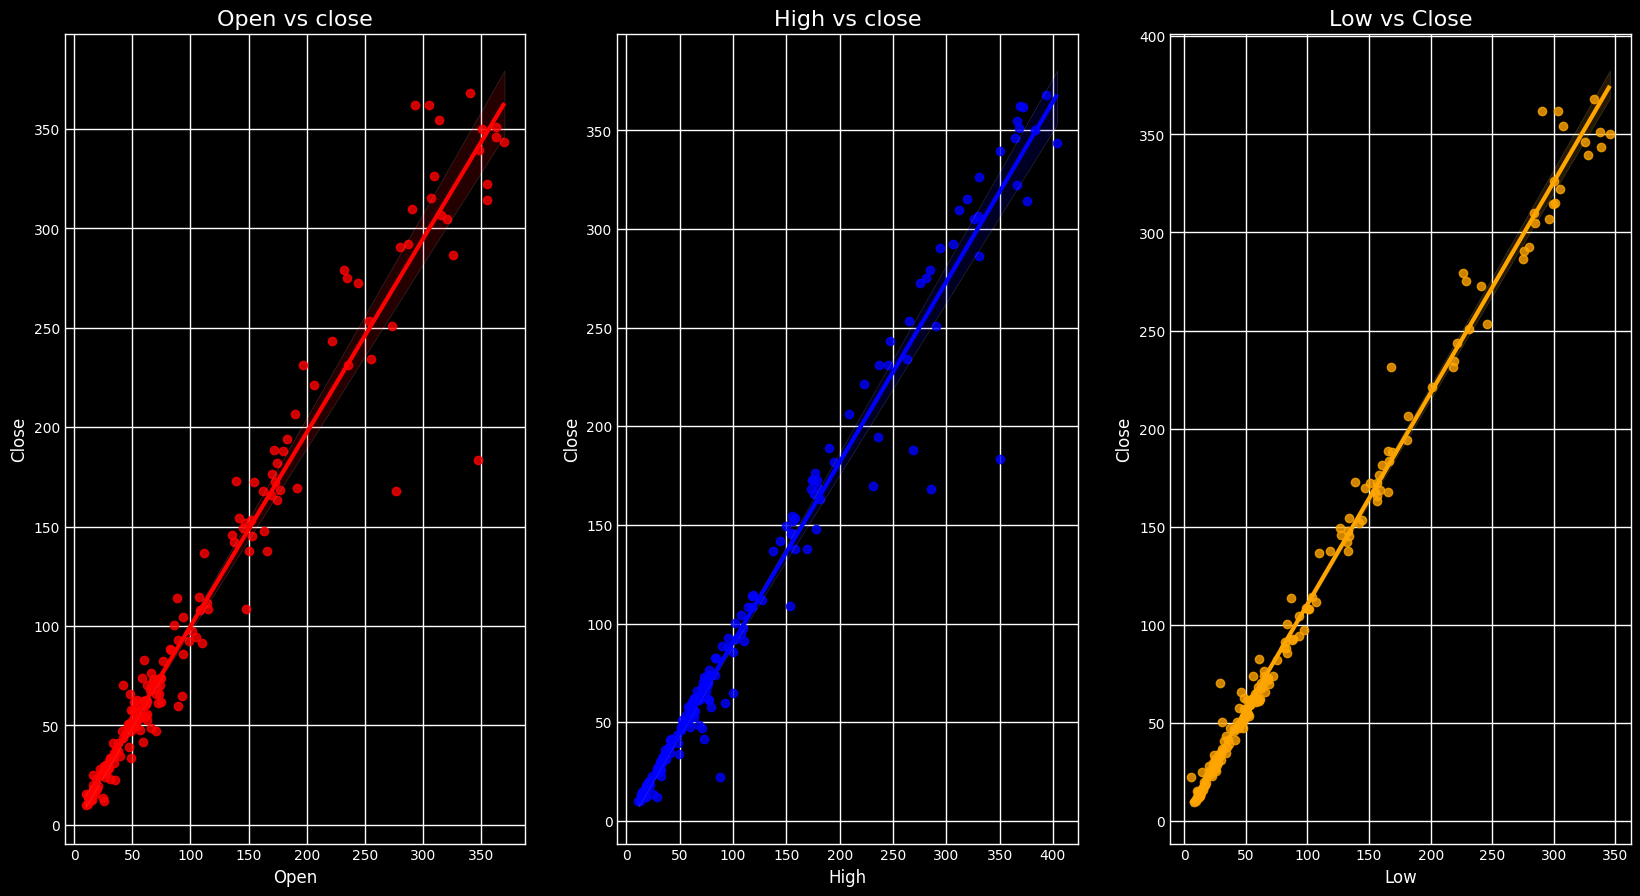

In [ ]:
# scatter plot to see the relationship between target dependent (closing price) and independent variables
plt.figure(figsize = (18,10))
#creating different subplot again. 

plt.subplot(1,3,1)
sns.regplot(x='Open' , y='Close',
            data = df ,scatter_kws={"color": "red"}, line_kws={"color": "red"})
plt.title('Open vs close')

plt.subplot(1,3,2)
sns.regplot(x='High' , y='Close',
            data = df ,scatter_kws={"color": "blue"}, line_kws={"color": "blue"})
plt.title('High vs close')


plt.subplot(1,3,3)
sns.regplot(x='Low' , y='Close',
            data = df ,scatter_kws={"color": "orange"}, line_kws={"color": "orange"})
plt.title('Low vs Close')

# **Conclusion**


*   All regression lines show a relationship, it appears that all independent variables are directly proportional to the target.



# **corelation of independent variable.**

<Axes: >

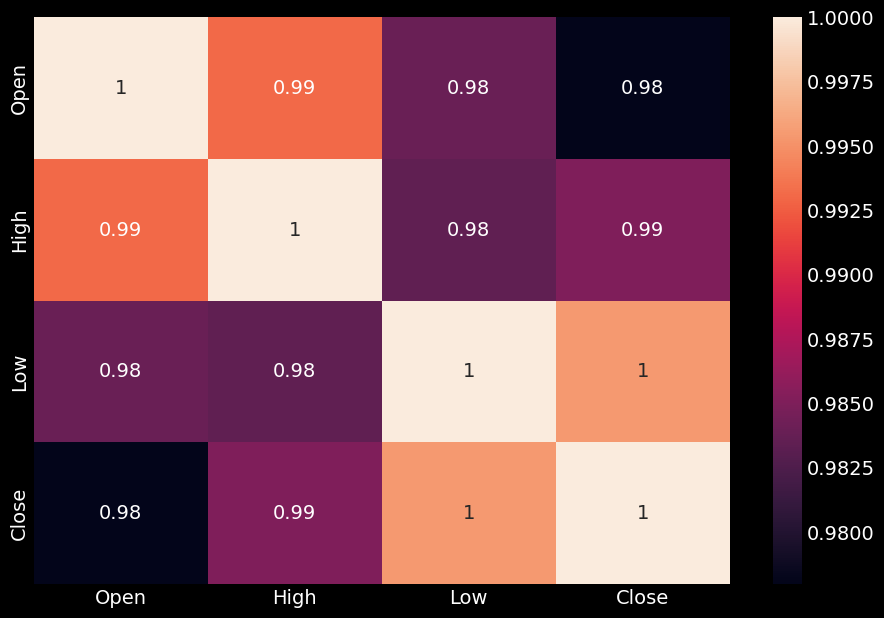

In [ ]:
plt.figure(figsize = (10,7))
plt.style.use("fivethirtyeight")
sns.heatmap(df.corr(), annot = True)

#**Conclusion**
* showing a high corelation

<Axes: title={'center': 'Box plot'}>

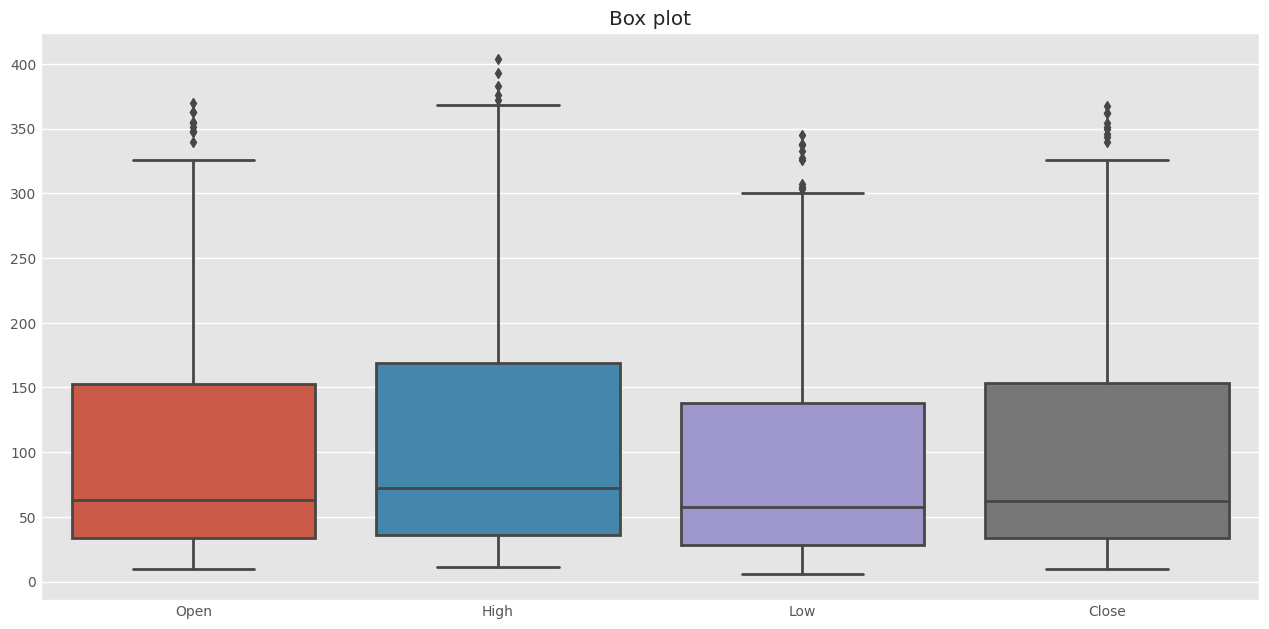

In [ ]:
#check the box plot.
plt.figure(figsize = (14,7))
plt.title('Box plot')
sns.boxplot(data = df)

# **Conclusion**
* There are a few outliers. Every feature is extremely corelated with each other.
*  The median are close to each other.

# **Multicollinearity**

Determine the variation inflation factor (VIF), To see the relationship between independent variables

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)

In [ ]:
calculate_vif(df[[i for i in df.describe().columns if i not in ["Date", "Close"]]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


The  VIF is very high. We are not removing any features from the dataset while we attempt to predict the outcome, assess the model's performance, and make adjustments as necessary.

# **Train & Test Split**

* X = Independant Variable.

* y = Dependent Variable.

In [ ]:
# Split data into Independent and Dependent Variables
x = df[['Open', 'High', 'Low']]
y = df['Close']

In [ ]:
# Data Tranformation
from scipy.stats import zscore
x = x.apply(zscore)
y = np.log10(y)


In [ ]:
# Split our data into train (80%) and test datasets (20%)
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.20 , random_state = 1) 

In [ ]:
# Shape of Training dataset
print(x_train.shape)

(148, 3)


In [ ]:
# Shape of Test dataset
print(x_test.shape)

(37, 3)


Now We will apply 
* 1) Linear Regression 
* 2) Lasso Regression
* 3) Ridge Regression 
* 4) Elastic Net regression
* 5) GradientBoostingRegressor

  regression model and compare there accuracy.



# **1.   Linear Regression**



In [ ]:
#fit the data into Linear Regression
l_reg = LinearRegression()
l_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Scoring train
l_reg.score(x_train , y_train)

0.8146653424416905

In [ ]:
#scoring test
l_reg.score(x_test , y_test)

0.8225699915389754

In [ ]:
Prediction=l_reg.predict(x_test)

In [ ]:
Prediction_t=l_reg.predict(x_train)

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
#Making a DF for testing & train Dataset
train_Dataframe = pd.DataFrame(x_train,y_train)
test_Dataframe = pd.DataFrame(y_test)
test_Dataframe.rename(columns= {'Close' :'Actual Closing Price'}, inplace =True)

In [ ]:
test_Dataframe['Predicted Closing Price']= Prediction
test_Dataframe.head()
     

,Actual Closing Price,Predicted Closing Price
16,1.403464,1.517387
179,1.408240,1.532118
66,1.720903,1.635190
40,1.088490,1.475394
166,2.170115,2.014715


#Testing Performence of Linear Regression Model

In [ ]:
# evaluate predictions
print("MSE :",round(mean_squared_error(y_test, Prediction), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test,Prediction)),3))
print("MAE :",round(mean_absolute_error(y_test,Prediction),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, Prediction),3))
print("R2 :",round(r2_score(y_test,Prediction), 3))

MSE : 0.032
RMSE : 0.178
MAE : 0.151
MAPE : 0.095
R2 : 0.823


**homoscadacity**

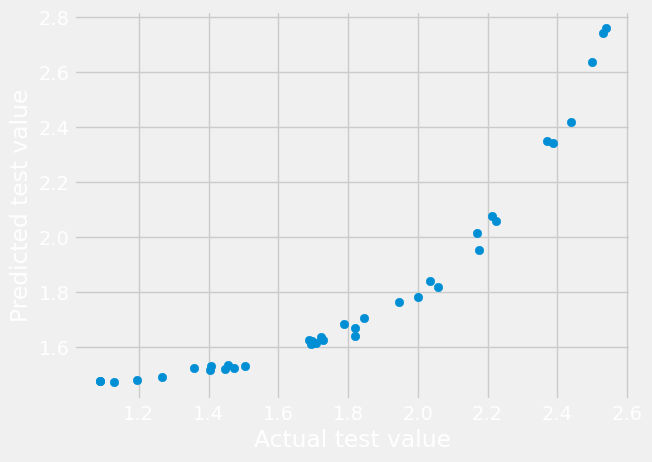

In [ ]:
#Actual vs Predicted Value Sctter Plot 
plt.scatter(y_test,Prediction)
plt.xlabel('Actual test value')
plt.ylabel('Predicted test value')
sns.set_style("darkgrid")

# Actual Price vs Prediction price for Linear Regression plot

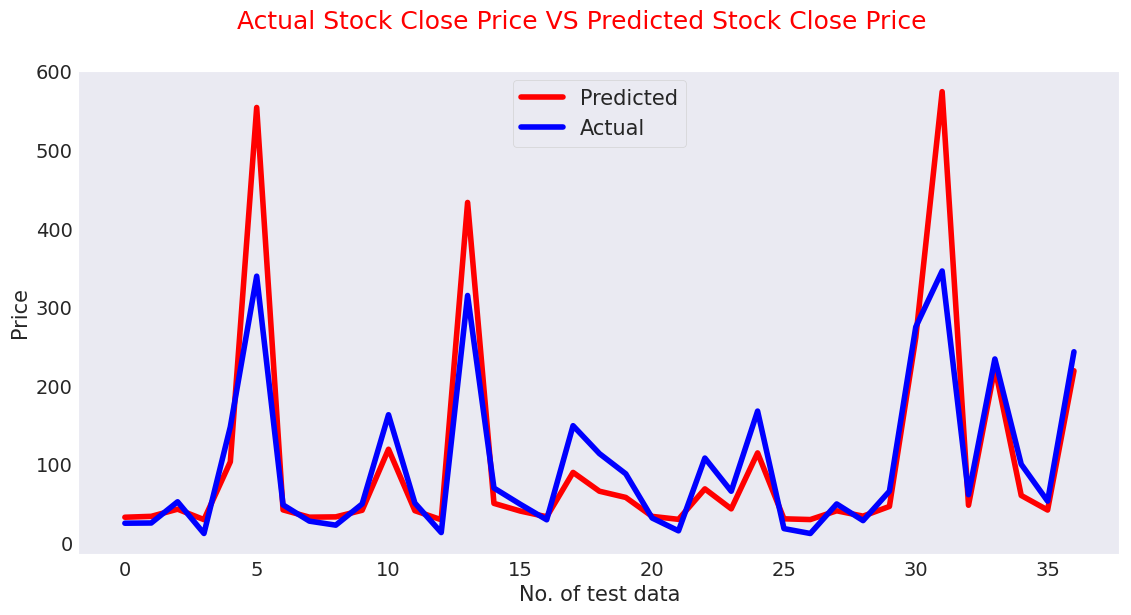

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(10**(Prediction),color="red")             
plt.plot(10**(np.array(y_test)),color="blue")           
plt.xlabel("No. of test data",fontsize= 15)
plt.ylabel("Price",fontsize= 15)
plt.suptitle("Actual Stock Close Price VS Predicted Stock Close Price",fontsize=18,color="red")
plt.legend(["Predicted","Actual"],fontsize= 15)
plt.grid()
plt.style.use("dark_background")
plt.show()

#**2. Lasso Regression**

In [ ]:
l_model = Lasso(alpha=0.005, max_iter = 3000)
l_model.fit(x_train, y_train) 

Lasso(alpha=0.005, max_iter=3000)

In [ ]:
y_pred = l_model.predict(x_test)

In [ ]:
y_pred_t = l_model.predict(x_train)

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
#compare the Actual and Predicted values.
test_df = pd.DataFrame(y_test)
test_df.rename(columns = {'close' : 'Actual closing price'} , inplace = True)
test_df['Predicted closing price In Lasso'] = y_pred

test_df.head()

,Close,Predicted closing price In Lasso
16,1.403464,1.520555
179,1.408240,1.535773
66,1.720903,1.640738
40,1.088490,1.480070
166,2.170115,2.014612


In [ ]:
# Evaluation Metrics of Lasso Regression
print("MSE score:", round(mean_squared_error (y_test, y_pred), 3))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test, y_pred)), 3))
print("MAE score:", round(mean_absolute_error(y_test, y_pred), 3))
print("MAPE score:", round(mean_absolute_percentage_error(y_test, y_pred), 3))
print("R2 score:", round(r2_score(y_test, y_pred), 3))

MSE score: 0.032
RMSE score: 0.179
MAE score: 0.152
MAPE score: 0.096
R2 score: 0.82


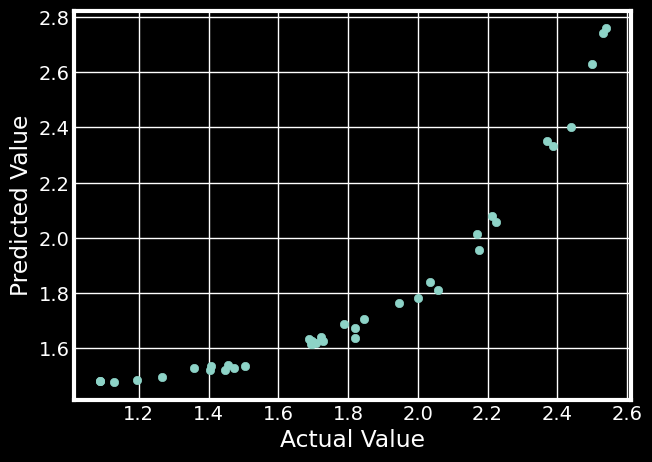

In [ ]:
# Scatter Plot Actual Value vs Predicted Value
plt.scatter((y_test), (y_pred))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
sns.set_style("darkgrid")
     

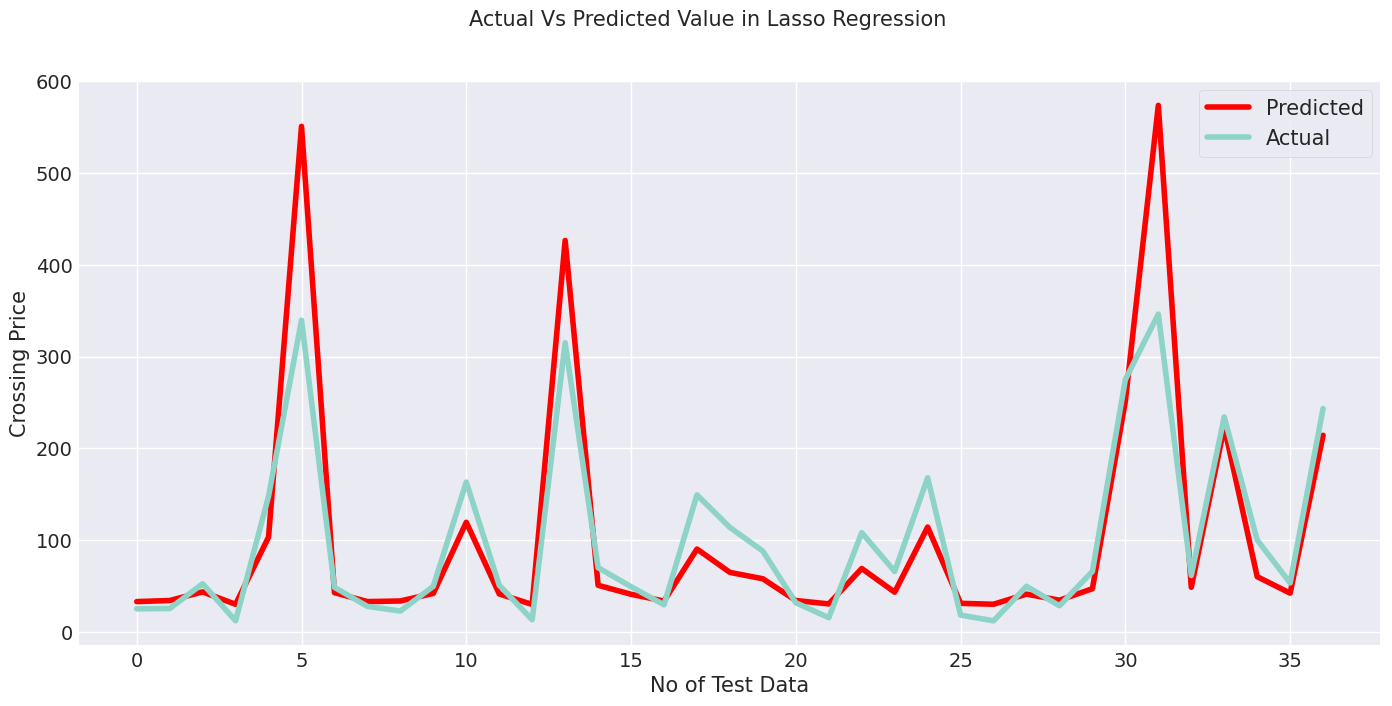

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(10**(y_pred),color='red')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value in Lasso Regression', fontsize= 15)
plt.legend(['Predicted','Actual'], fontsize = 15)
plt.xlabel('No of Test Data', fontsize = 15)
plt.ylabel('Crossing Price', fontsize= 15)
plt.grid(True)
plt.style.use("dark_background")

**Lasso Regression Cross Validation**

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_model_cv = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)

In [ ]:
lasso_model_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
print(" The best Fit alpha value is found out to be :", round(lasso_model_cv.best_params_['alpha'], 4))
print(" The negative mean squared error is : ", round(lasso_model_cv. best_score_,4))

 The best Fit alpha value is found out to be : 0.01
 The negative mean squared error is :  -0.0352


In [ ]:
#prediction of test data.
y_pred_lasso_cv = lasso_model_cv.predict(x_test)
y_pred_lasso_cv_t = lasso_model_cv.predict(x_train)

In [ ]:
# Test Performance
print("MSE score:", round(mean_squared_error (y_test,y_pred_lasso_cv), 4))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test,y_pred_lasso_cv)), 4))
print("MAE score:", round(mean_absolute_error(y_test,y_pred_lasso_cv), 4))
print("MAPE score:", round(mean_absolute_percentage_error(y_test, y_pred_lasso_cv), 4))
print("R2 score:", round(r2_score(y_test,y_pred_lasso_cv), 4))

MSE score: 0.0322
RMSE score: 0.1795
MAE score: 0.1528
MAPE score: 0.0968
R2 score: 0.819


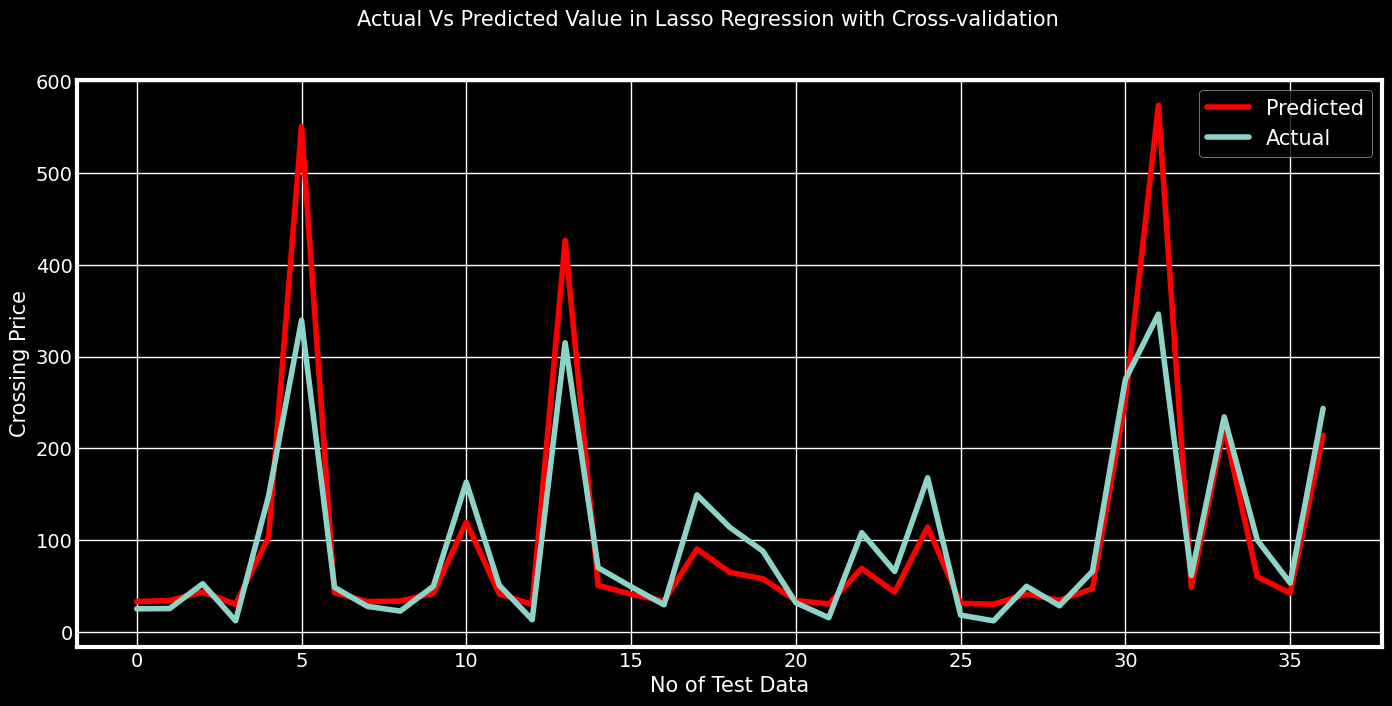

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(10**(y_pred),color='red')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value in Lasso Regression with Cross-validation', fontsize= 15)
plt.legend(['Predicted','Actual'], fontsize = 15)
plt.xlabel('No of Test Data', fontsize = 15)
plt.ylabel('Crossing Price', fontsize= 15)
plt.grid(True)

#**3. Ridge Regression**

In [ ]:
ridge_reg = Ridge(alpha=0.01)
ridge_reg_model = ridge_reg.fit(x_train,y_train)

In [ ]:
#accuracy of lasso regression model
round(ridge_reg.score(x_train,y_train),3)

0.815

In [ ]:
#predict of test data.
y_pred_ridge = ridge_reg.predict(x_test)

In [ ]:
y_pred_ridge_t = ridge_reg.predict(x_train)

In [ ]:
# Test Performance
print("MSE score:", round(mean_squared_error (y_test, y_pred_ridge), 4))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test,y_pred_ridge)), 4))
print("MAE score:", round(mean_absolute_error(y_test,y_pred_ridge), 4))
print("MAPE score:", round(mean_absolute_percentage_error(y_test,y_pred_ridge), 4))
print("R2 score:", round(r2_score(y_test,y_pred_ridge), 4))

MSE score: 0.0316
RMSE score: 0.1777
MAE score: 0.1513
MAPE score: 0.0954
R2 score: 0.8225


Text(0, 0.5, 'Predicted Value')

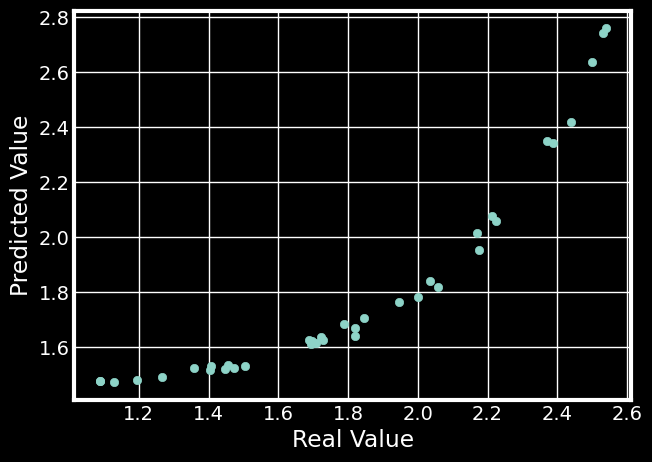

In [ ]:
plt.scatter((y_test),(y_pred_ridge))
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')

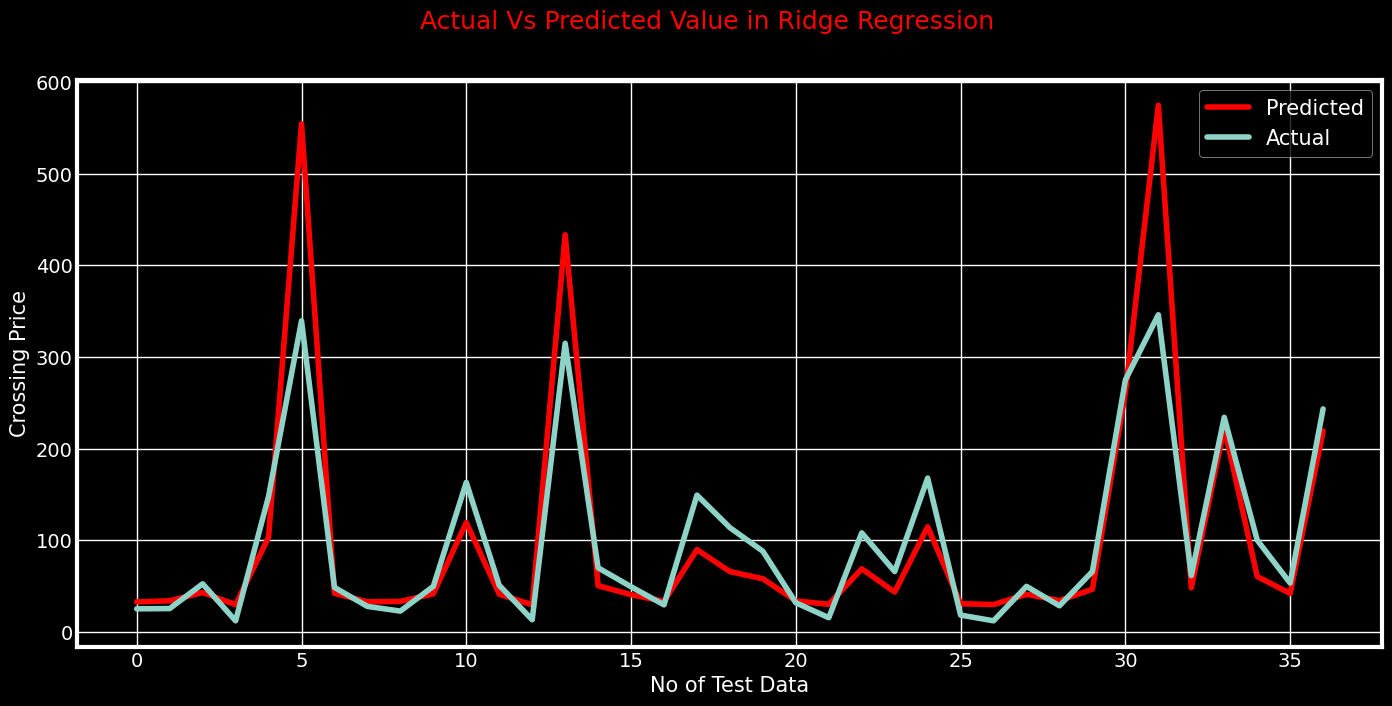

In [ ]:
# Actual Price vs. Predicted Price for Ridge Regression Plotting
plt.figure(figsize=(15,7))
plt.plot(10**(y_pred_ridge),color='red')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value in Ridge Regression', fontsize= 18,color='red')
plt.legend(['Predicted','Actual'], fontsize = 15)
plt.xlabel('No of Test Data', fontsize = 15)
plt.ylabel('Crossing Price', fontsize= 15)
plt.style.use("Solarize_Light2")
plt.grid(True)

**Cross Validation on Ridge Regression**

In [ ]:
ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model_cv = GridSearchCV(ridge_cv, parameters,scoring = 'neg_mean_squared_error',cv = 3)

In [ ]:
ridge_model_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(" The Best Fit Alpha Value is found out to be :",ridge_model_cv.best_params_['alpha'])
print(" The negative MSE(mean squared error) score is :", round(ridge_model_cv.best_score_, 3))

 The Best Fit Alpha Value is found out to be : 10
 The negative MSE(mean squared error) score is : -0.035


In [ ]:
y_pred_ridge_cv = ridge_model_cv.predict(x_test)
y_pred_ridge_cv_t = ridge_model_cv.predict(x_train)

In [ ]:
# Test Performance 
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge_cv),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_ridge_cv), 3))

MSE : 0.033
RMSE : 0.18
MAE : 0.153
MAPE : 0.097
R2 : 0.817


**Ridge Regression After Validation: Actual Vs. Predicted**

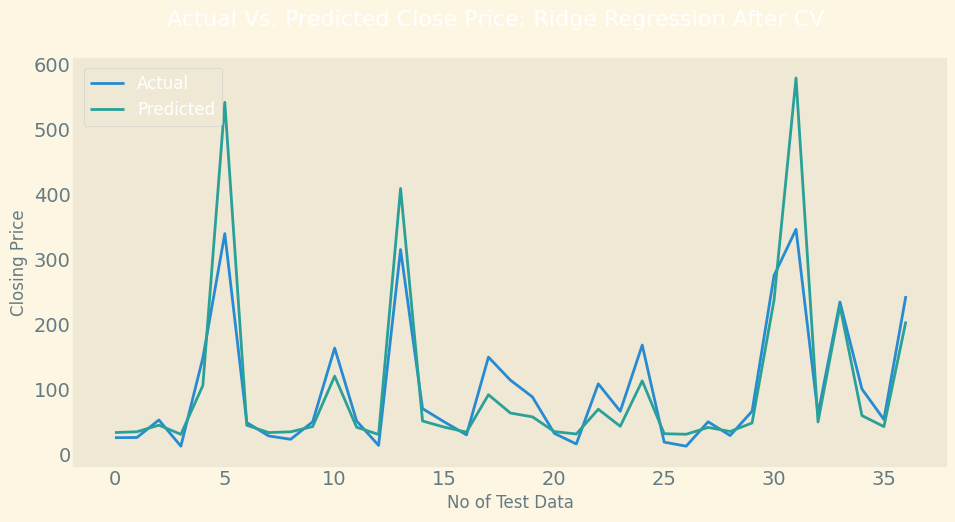

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **4. Elastic Net regression**

In [ ]:
#fitting data
elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_model = elastic.fit(x_train,y_train)

In [ ]:
#accuracy 
round(elastic.score(x_train,y_train),3)

0.796

In [ ]:
#prediction
y_pred_elastic = elastic.predict(x_test)

In [ ]:
y_pred_elastic_t = elastic.predict(x_train)

In [ ]:
# Test Performance 
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),3))
print("R2 :",round(r2_score(y_test, y_pred_elastic), 3))

MSE : 0.036
RMSE : 0.191
MAE : 0.157
MAPE : 0.102
R2 : 0.796


Text(0, 0.5, 'Predicted Value')

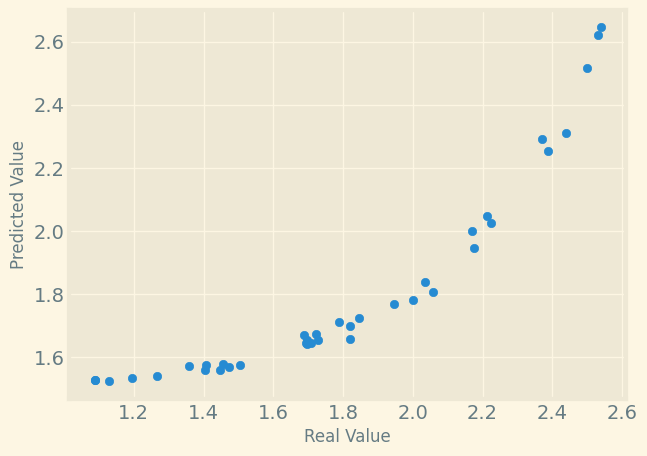

In [ ]:
plt.scatter((y_test),(y_pred_elastic))
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')

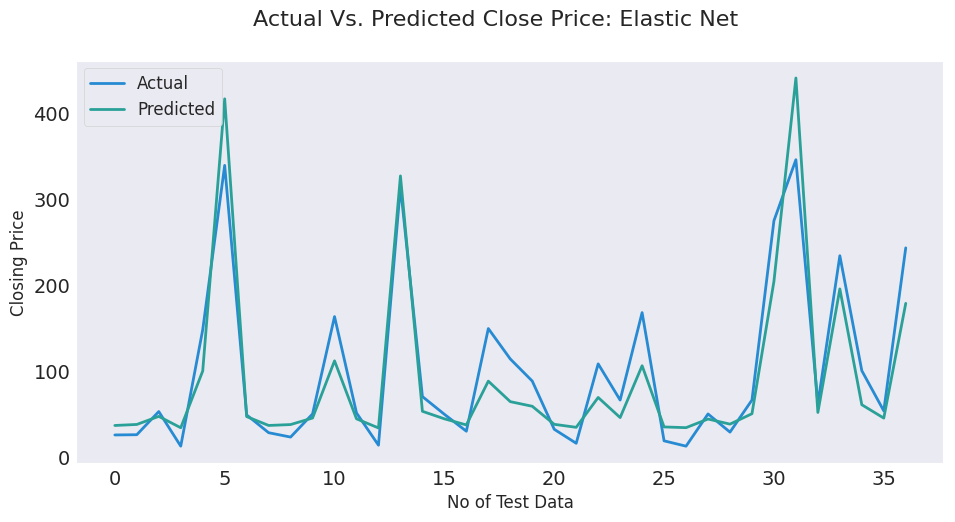

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net Plotting
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **5.GradientBoostingRegressor**

In [ ]:
#initialize and fit GradientBoosting regressor
gb_regressor=GradientBoostingRegressor()
gb_regressor.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_pred_test=gb_regressor.predict(x_test)
y_pred_train_g=gb_regressor.predict(x_train)

In [ ]:
#randomforest regressor of value of MAE,MSE,RMSE,r2_score
print("RMSE :",round(math.sqrt(mean_squared_error(y_test,y_pred_test)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_test),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test,y_pred_test),3))
print("R2 :",round(r2_score(y_test,y_pred_test), 3))

RMSE : 0.042
MAE : 0.031
MAPE : 0.02
R2 : 0.99


Text(0, 0.5, 'Predicted Value')

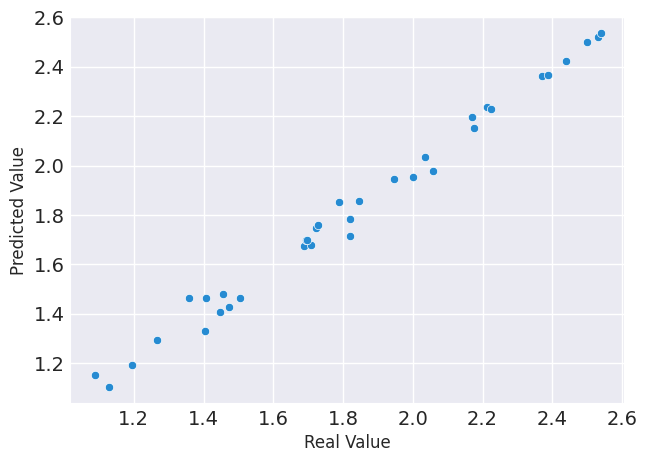

In [ ]:
sns.scatterplot(x=y_test,y=y_pred_test,palette="viridis")
plt.style.use("ggplot")
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')

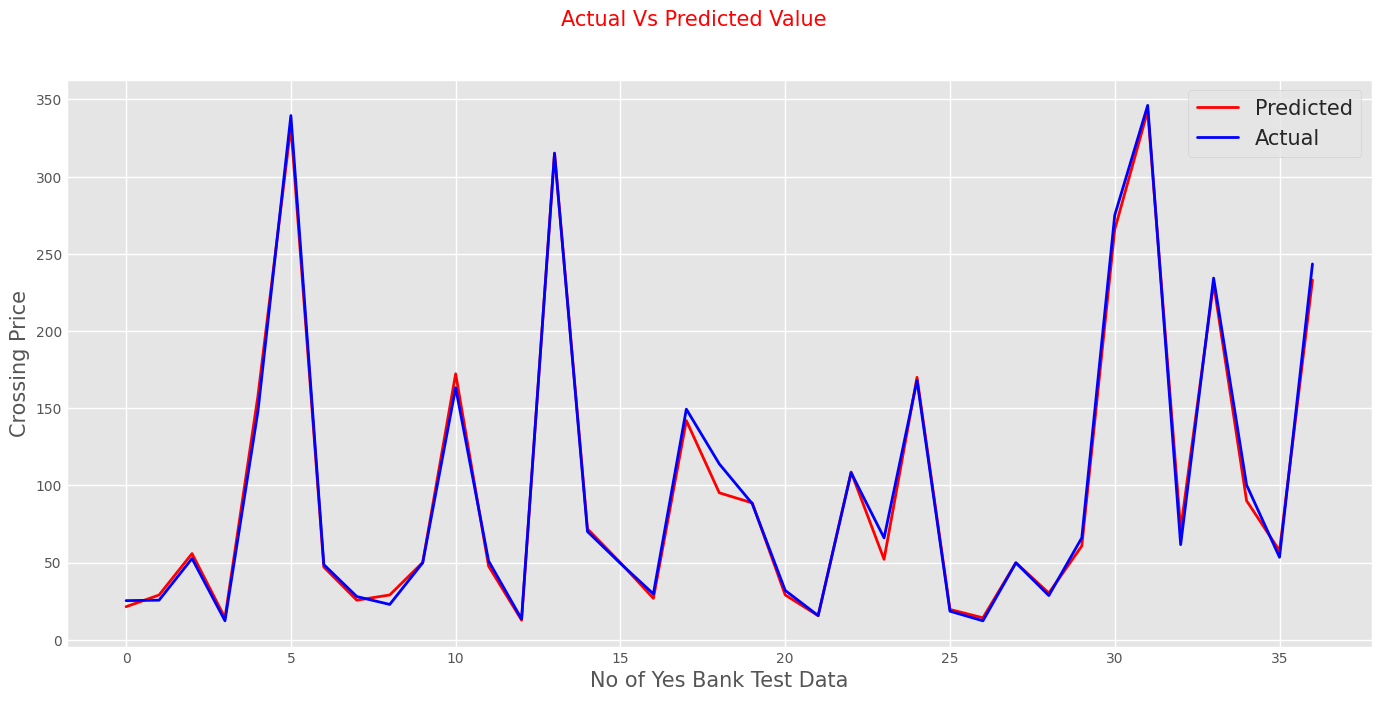

In [ ]:
plt.figure(figsize=(15,7))
plt.style.use("ggplot")
plt.plot(10**((y_pred_test)),color='red')
plt.plot(10**(np.array(y_test)),color='blue')
plt.suptitle('Actual Vs Predicted Value ', fontsize= 15,color='red')
plt.legend(['Predicted','Actual'], fontsize = 15)
plt.xlabel('No of Yes Bank Test Data', fontsize = 15)
plt.ylabel('Crossing Price', fontsize= 15)
plt.grid(True)

# **6.XGBRegressor**



In [ ]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#train score
round(xgb.score(x_train , y_train),3)

xg_pred = xgb.predict(x_test)

In [ ]:
# Test Performance
print("MSE score:", round(mean_squared_error (y_test,xg_pred), 4))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test, xg_pred)), 4))
print("MAE score:", round(mean_absolute_error(y_test,xg_pred), 4))
print("MAPE score:", round(mean_absolute_percentage_error(y_test,xg_pred), 4))
print("R2 score:", round(r2_score(y_test,xg_pred), 4))


MSE score: 0.0019
RMSE score: 0.0433
MAE score: 0.0314
MAPE score: 0.0205
R2 score: 0.9894


Text(0.5, 0.98, 'Actual Vs Predicted Value in XG Boost')

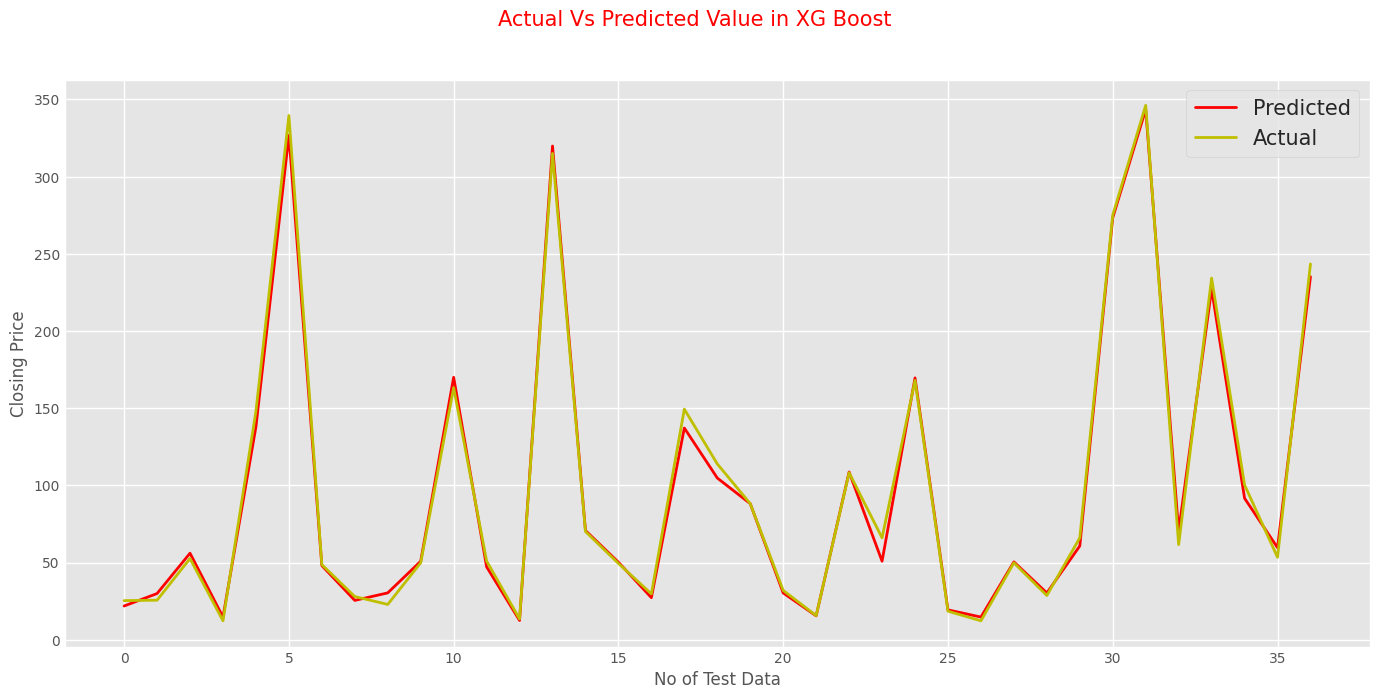

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(10**((xg_pred)),color='red')
plt.plot(10**(np.array(y_test)),color='y')
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.legend(['Predicted','Actual'], fontsize = 15)
plt.suptitle('Actual Vs Predicted Value in XG Boost', fontsize= 15,color='red')

# **Compare all the Models**

In [ ]:
#Define all models 
all_reg=[
    ['LinearRegression:',l_reg],
    ['Lasso Regression:',lasso_model_cv],
    ['Ridge Regression:',ridge_model_cv],
    ['GradientBoostingRegressor:',gb_regressor],
    ['ElasticNetCV:',elastic],
    ['XGBRegressor:',xgb]  
]

In [ ]:
all_reg

[['LinearRegression:', LinearRegression()],
 ['Lasso Regression:',
  GridSearchCV(cv=3, estimator=Lasso(),
               param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                     0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                     50, 55, 60, 100]},
               return_train_score=True, scoring='neg_mean_squared_error')],
 ['Ridge Regression:',
  GridSearchCV(cv=3, estimator=Ridge(),
               param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                     0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                     50, 55, 60, 100]},
               scoring='neg_mean_squared_error')],
 ['GradientBoostingRegressor:', GradientBoostingRegressor()],
 ['ElasticNetCV:', ElasticNet(alpha=0.1)],
 ['XGBRegressor:',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsam

In [ ]:
model_data=[]
for name,current_model in all_reg:
  curr_model_data={}
  current_model.random_state=1
  curr_model_data['Name']=name
  if(name!='LinearRegression: '):
    current_model.fit(x_train,y_train)
    curr_model_data['MAE']=round(mean_absolute_error(y_test,current_model.predict(x_test)),3)
    curr_model_data['MSE']=round(mean_squared_error(y_test,current_model.predict (x_test)),3)
    curr_model_data['RMSE']=round(np.sqrt(mean_squared_error(y_test, current_model.predict(x_test))),3)
    curr_model_data['R2_score']=round(r2_score(y_test,current_model.predict (x_test)),3)
    model_data.append(curr_model_data)

In [ ]:
# create dataframe 
df_table=pd.DataFrame(model_data)
df_table

,Name,MAE,MSE,RMSE,R2_score
0,LinearRegression:,0.151,0.032,0.178,0.823
1,Lasso Regression:,0.153,0.032,0.180,0.819
2,Ridge Regression:,0.153,0.033,0.180,0.817
3,GradientBoostingRegressor:,0.030,0.002,0.041,0.991
4,ElasticNetCV:,0.157,0.036,0.191,0.796
5,XGBRegressor:,0.031,0.002,0.043,0.989


## **Conclusion**

* Beginning from Exploratory Data Analysis we see the sudden change in stock price from 2014.
* Bank share price is at the highest in 2018-19.After there is a Sudden fall in price of stock .
* After that stock price start to increase again but price fall again.
* From the scatter plot we can see High,open,low price of share are directly correlate with the closing price of share.
* we applied following regression model on data set and result are evaluted and compared


1.  LinearRegression
2.	Lasso Regression
3.	Ridge Regression
4.	GradientBoostingRegressor
5.	ElasticNetCV
6.	XGBRegressor



*  we check test performance such as mean absoulte error, mean squared error, root mean squared error, r2 
* We got 99% highest accuracy for GradientBoosting Regression and 98% for XGB Regressor
* we got almost simillar result for LinearRegression,Lasso Regression and Ridge Regression
* Cross Validation has been applied on various algorithms. However, the outcome is nearly identical.
* Using data on the closing price of Yes Bank's shares, GradientBoostingRegressor and Xgboost regression is the best model to apply.


